In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Instantiate the InceptionV3 model
InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in InceptionV3_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential([
    InceptionV3_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Replace num_classes with the number of classes in your dataset
])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_trainf',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)


Found 7910 images belonging to 6 classes.
Found 2458 images belonging to 6 classes.


In [9]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model using the testing data
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20


248/248 [==============================] - 1159s 5s/step - loss: 0.9300 - accuracy: 0.6604 - val_loss: 0.3350 - val_accuracy: 0.9260
Epoch 2/20
248/248 [==============================] - 1100s 4s/step - loss: 0.5102 - accuracy: 0.8306 - val_loss: 0.2647 - val_accuracy: 0.9333
Epoch 3/20
248/248 [==============================] - 1009s 4s/step - loss: 0.4046 - accuracy: 0.8633 - val_loss: 0.2372 - val_accuracy: 0.9443
Epoch 4/20
248/248 [==============================] - 1006s 4s/step - loss: 0.3423 - accuracy: 0.8871 - val_loss: 0.2318 - val_accuracy: 0.9394
Epoch 5/20
248/248 [==============================] - 1090s 4s/step - loss: 0.3020 - accuracy: 0.8979 - val_loss: 0.2143 - val_accuracy: 0.9516
Epoch 6/20
248/248 [==============================] - 1059s 4s/step - loss: 0.2700 - accuracy: 0.9095 - val_loss: 0.2086 - val_accuracy: 0.9532
Epoch 7/20
248/248 [==============================] - 981s 4s/step - loss: 0.2433 - accuracy: 0.9181 - val_loss: 0.1963 - val_accuracy

In [10]:
model.save('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

C:\Users\Ramkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 3s 3s/step


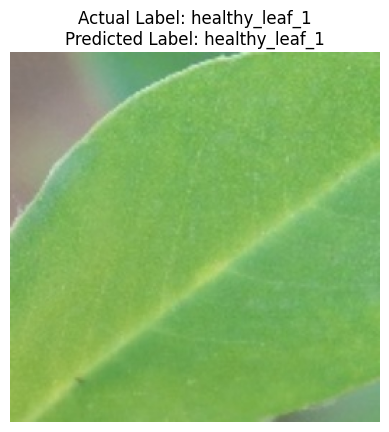

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/healthy_leaf_1/40.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "healthy_leaf_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step


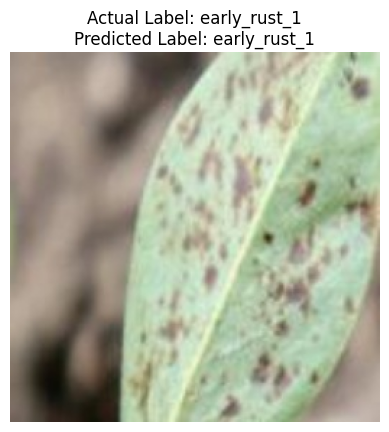

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_rust_1/dr_0_7858.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "early_rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step


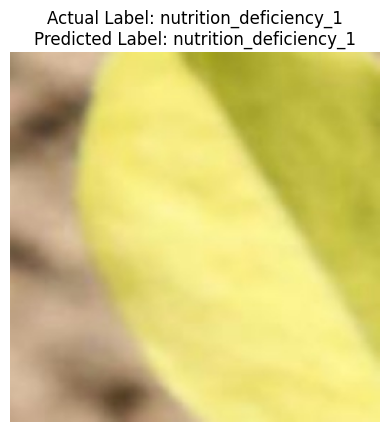

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/nutrition_deficiency_1/dr_0_5082.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "nutrition_deficiency_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step


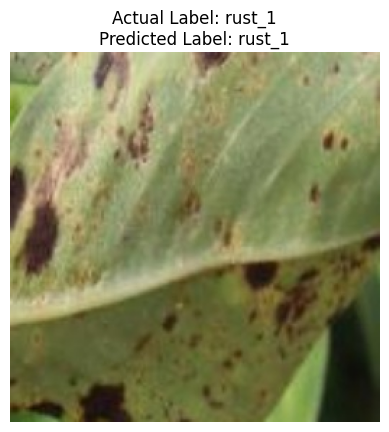

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/rust_1/dr_0_3853.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step


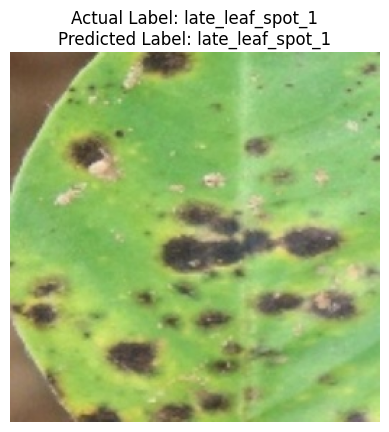

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/late_leaf_spot_1/22.jpg"
img = image.load_img(img_path, target_size=(256, 256)) 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "late_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step


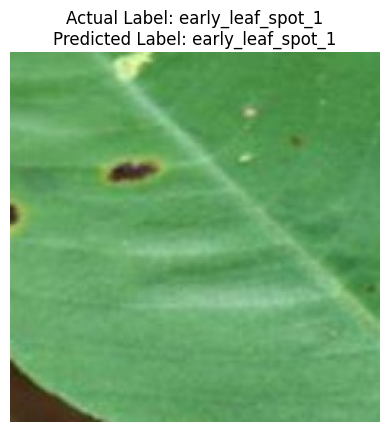

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Inceptionv3.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_leaf_spot_1/dr_0_1138.jpg"
img = image.load_img(img_path, target_size=(256, 256)) 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "early_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


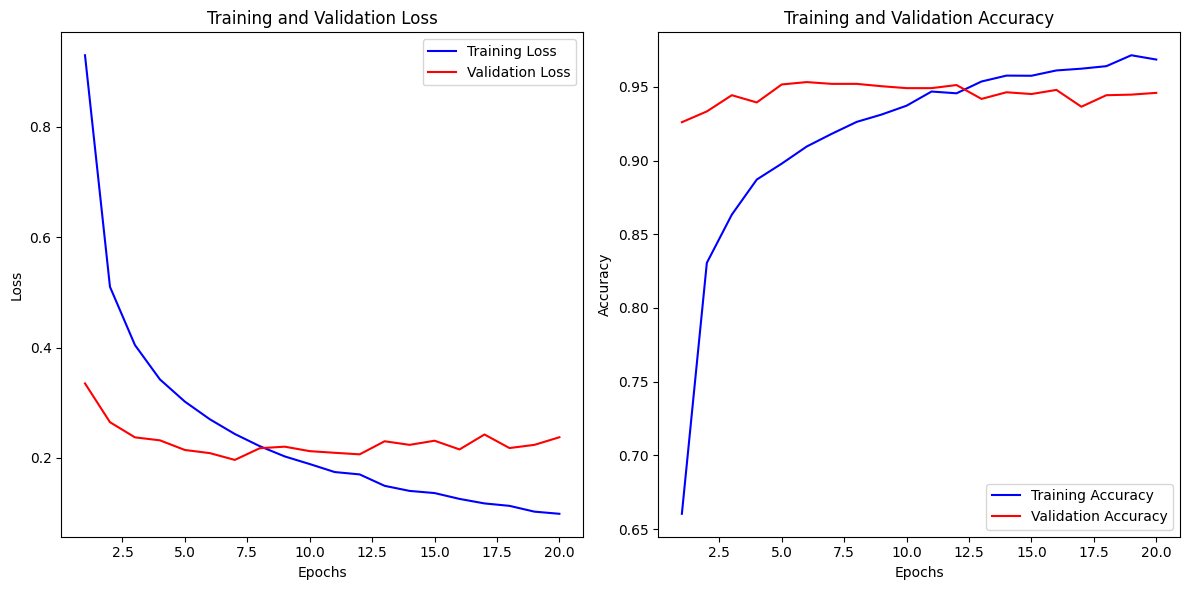

In [3]:
import matplotlib.pyplot as plt

# Data from the training process
training_loss = [0.9300, 0.5102, 0.4046, 0.3423, 0.3020, 0.2700, 0.2433, 0.2212, 0.2026, 0.1888, 0.1743, 0.1700, 0.1493, 0.1401, 0.1362, 0.1256, 0.1174, 0.1130, 0.1025, 0.0986]
training_accuracy = [0.6604, 0.8306, 0.8633, 0.8871, 0.8979, 0.9095, 0.9181, 0.9262, 0.9312, 0.9372, 0.9468, 0.9456, 0.9536, 0.9576, 0.9575, 0.9611, 0.9623, 0.9640, 0.9714, 0.9685]

validation_loss = [0.3350, 0.2647, 0.2372, 0.2318, 0.2143, 0.2086, 0.1963, 0.2175, 0.2203, 0.2122, 0.2092, 0.2064, 0.2301, 0.2236, 0.2311, 0.2153, 0.2424, 0.2178, 0.2236, 0.2374]
validation_accuracy = [0.9260, 0.9333, 0.9443, 0.9394, 0.9516, 0.9532, 0.9520, 0.9520, 0.9504, 0.9491, 0.9491, 0.9512, 0.9418, 0.9463, 0.9451, 0.9479, 0.9365, 0.9443, 0.9447, 0.9459]

epochs = range(1, 21)  # Assuming 20 epochs

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
